In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

# Part 1: Data preparation

## Step 1: Open the file and study the general information

In [2]:
train = pd.read_csv("/datasets/gold_recovery_train.csv")
test = pd.read_csv("/datasets/gold_recovery_test.csv")
full = pd.read_csv("/datasets/gold_recovery_full.csv")

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.info()
full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


A preliminary look at the data shows that we need to preprocess the data:

1. Convert the date column in each data set to datetime objects
2. Drop null values in each dataset
3. Remove unecessary features for training our model
4. Create the targets for our ML model. In this case, it will be **rougher.output.recovery** and **final.output.covery**, which we need to determine the Final sMAPE.

Alternatively we can fill our data with the values in the previous rows, but since the amount of rows with null values is negligible, we can drop them.

## Step 2: Preprocess the Data

In [6]:
#convert to datetime objects
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
full['date'] = pd.to_datetime(full['date'])

#check
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant     

In [7]:
#drop nulls
train = train.dropna()
test = test.dropna()
full = full.dropna()


train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  11017 non-null datetime64[ns]
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant     

In [8]:
#remove unnecessary columns
test_list = list(test.columns.values) +['rougher.output.recovery', 'final.output.recovery']
processed_train = train.loc[:, test_list]
processed_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 16859
Data columns (total 55 columns):
date                                          11017 non-null datetime64[ns]
primary_cleaner.input.sulfate                 11017 non-null float64
primary_cleaner.input.depressant              11017 non-null float64
primary_cleaner.input.feed_size               11017 non-null float64
primary_cleaner.input.xanthate                11017 non-null float64
primary_cleaner.state.floatbank8_a_air        11017 non-null float64
primary_cleaner.state.floatbank8_a_level      11017 non-null float64
primary_cleaner.state.floatbank8_b_air        11017 non-null float64
primary_cleaner.state.floatbank8_b_level      11017 non-null float64
primary_cleaner.state.floatbank8_c_air        11017 non-null float64
primary_cleaner.state.floatbank8_c_level      11017 non-null float64
primary_cleaner.state.floatbank8_d_air        11017 non-null float64
primary_cleaner.state.floatbank8_d_level      11017 non-

In [9]:
#create target columns
targets = full[['date', 'rougher.output.recovery', 'final.output.recovery']]

test_processed = test.merge(targets, how='left', on='date')

test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5382
Data columns (total 55 columns):
date                                          5383 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5383 non-null float64
primary_cleaner.input.depressant              5383 non-null float64
primary_cleaner.input.feed_size               5383 non-null float64
primary_cleaner.input.xanthate                5383 non-null float64
primary_cleaner.state.floatbank8_a_air        5383 non-null float64
primary_cleaner.state.floatbank8_a_level      5383 non-null float64
primary_cleaner.state.floatbank8_b_air        5383 non-null float64
primary_cleaner.state.floatbank8_b_level      5383 non-null float64
primary_cleaner.state.floatbank8_c_air        5383 non-null float64
primary_cleaner.state.floatbank8_c_level      5383 non-null float64
primary_cleaner.state.floatbank8_d_air        5383 non-null float64
primary_cleaner.state.floatbank8_d_level      5383 non-null float64
ro

## Step 3: Check recovery calculation

Let's first calculate our recovery, and determine the MAE between the rougher.output.recovery feature, and our calculated recovery values.

In [31]:
'''
To calculate recovery, we need to obtain three variables:
1. Share of gold concentration in the output. In this case it's the amount after flotation.
2. Share of gold before flotation. In this case it's the amount in the rougher feed.
3. Share of gold in the rougher tails. In this case it's the amount after flotation.

'''

def calculate_recovery(gold_concentrate, feed_gold, tails_gold):
    recovery = (gold_concentrate*(feed_gold-tails_gold))/(feed_gold*(gold_concentrate-tails_gold)) * 100
    print(recovery.head())
    return recovery

recovery = train['rougher.output.recovery']

concentrate = train['rougher.output.concentrate_au']
feed = train['rougher.input.feed_au']
tails = train['rougher.output.tail_au']

calculated_recovery = calculate_recovery(concentrate, feed, tails)


mae = mean_absolute_error(recovery, calculated_recovery)
#mae = np.sum(np.abs(train['calculated_recovery']-recovery))/len(recovery) #alternatively this

print("Mean absolute error:", mae)

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64
Mean absolute error: 9.555596961987514e-15


Looks like our calculation is correct - the calculated recovery is pretty much the same as the value in the table.

## Step 4: Analyze features in test set

Our test set does not contain features pertaining to calculation characteristics, and product parameters(parameters of type **calculation** and **product**). These include the parameters **concentrate_ag, concentrate_pb, concentrate_sol, concentrate_au, tail_ag, tail_pb, tail_sol, tail_au, sulfate_to_au_concentrate, floatbank10_sulfate_to_au_feed, floatbank11_sulfate_to_au_feed, and au_pb_ratio**

# Part 2: Analyze the data

## Step 1: Analyze metal concentration

We'll first analyze the changes in the concentration of different metals during each stage of the flotation process.

In [11]:
#define a reusable function for plotting each stage in the flotation process
'''
Our function will take a dataframe and list of features in a dataframe, and plot them on a single histogram. 
In this case, our dataframe will be the training set, and the list will be each stage in the flotation process for a given metal.
'''
def plot_stages(df, stage_list):
    for stage in stage_list:
        df[stage].plot(kind='hist', legend=True, alpha=0.5)
        plt.xlabel("concentration")

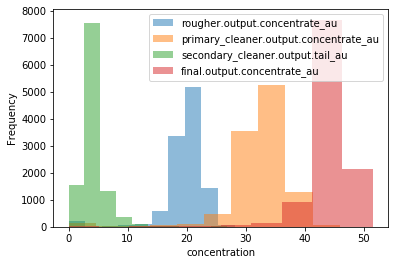

In [12]:
au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au','final.output.concentrate_au']

plot_stages(train, au)

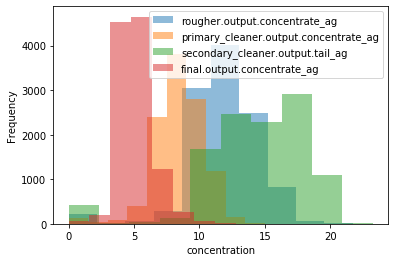

In [13]:
ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'secondary_cleaner.output.tail_ag','final.output.concentrate_ag']

plot_stages(train, ag)

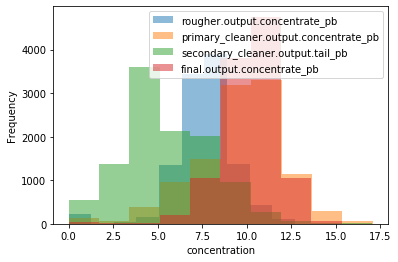

In [14]:
pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_pb','final.output.concentrate_pb']
plot_stages(train, pb)

As the flotation process continues, we hope that the concentration of gold increases throughout duration. This is reflected in the first graph; we can see this amount increase throughout each step. As for the other metals, we don't hope for the same. For silver we see this amount decrease over time, and a lot of it is filtered out during the secondary cleaning stage. Lead, on the other hand, has about the same concentration in the final output as compared to the rougher concentrate.

## Step 2: Compare feed particle size distribution

Analyzing the distribution helps us determine the reliability of using our particular training/testing datasets.

Train feed size mean: 57.215127655531404
Train feed size median: 53.843358546082705
Test feed size mean: 56.3386442150923
Test feed size median: 50.92423163700731


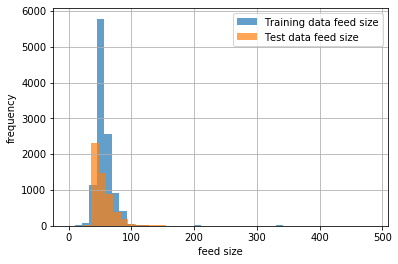

In [15]:
train['rougher.input.feed_size'].hist(alpha=.7, label="Training data feed size", bins=40)
test['rougher.input.feed_size'].hist(alpha=.7,label="Test data feed size", bins=40)
plt.legend()
plt.xlabel("feed size")
plt.ylabel("frequency")

print("Train feed size mean: {}\nTrain feed size median: {}".format(train['rougher.input.feed_size'].mean(),train['rougher.input.feed_size'].median()))
print("Test feed size mean: {}\nTest feed size median: {}".format(test['rougher.input.feed_size'].mean(),test['rougher.input.feed_size'].median()))

The distribution between the training set and the testing set is not significantly different, meaning that the model evaluation will not be incorrect.

## Step 3: Compare total concentration of substances at different stages

Finding outliers allows us to remove data that might impede in training our model.

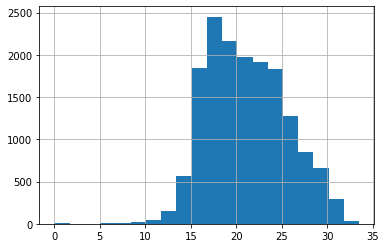

In [16]:
full['total_mixture'] = full[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 
    'rougher.input.feed_au']].sum(axis = 1, skipna = True)

full['total_mixture'].hist(bins=20)

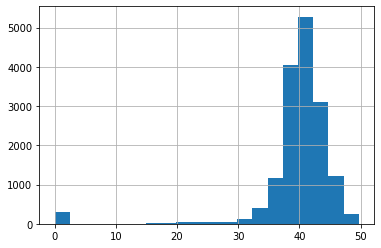

In [17]:
full['total_rougher_output'] = full[[
    'rougher.output.concentrate_ag','rougher.output.concentrate_pb', 
    'rougher.output.concentrate_au']].sum(axis = 1, skipna = True)
full['total_rougher_output'].hist(bins=20)

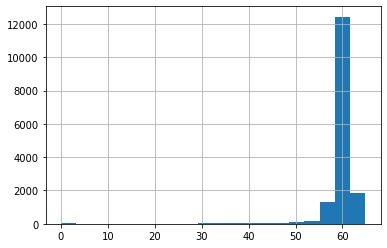

In [18]:
full['total_final_output'] = full[[
    'final.output.concentrate_ag','final.output.concentrate_pb', 
    'final.output.concentrate_au']].sum(axis = 1, skipna = True)

full['total_final_output'].hist(bins=20)

The data shows that our distributions are right skewed, with several outliers. We'll remove these outliers from our datasets to train our model better.

In [19]:
'''
we'll define a function that :
1. finds the interquartile range
2. determines the low/high fences
3. creates a map containing col_names as keys, and low/high fences as the values
4. removes outliers for each column based on the fences in the map
5. returns a processed new dataframe 
'''

from collections import defaultdict
def remove_outlier(df_in, col_names):
    fence_map = defaultdict(list)
    for name in col_names:
        q1 = df_in[name].quantile(0.25)
        q3 = df_in[name].quantile(0.75)
        iqr = q3-q1 
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        fence_map[name] = (fence_low, fence_high)
    df_out = df_in
    for k, v in fence_map.items():
        df_out = df_out.loc[(df_out[k] > v[0]) & (df_out[k] < v[1])]

    return df_out

parameters = ['total_mixture', 'total_rougher_output','total_final_output']

print(full.shape)

full_clean = remove_outlier(full, parameters)

print(full_clean.shape)

(16094, 90)
(14713, 90)


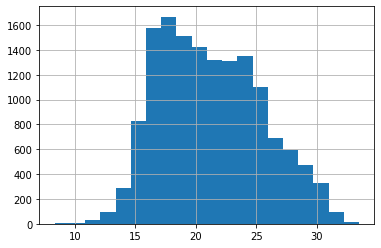

In [20]:
full_clean['total_mixture'].hist(bins=20)

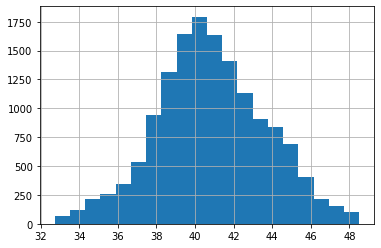

In [21]:
full_clean['total_rougher_output'].hist(bins=20)

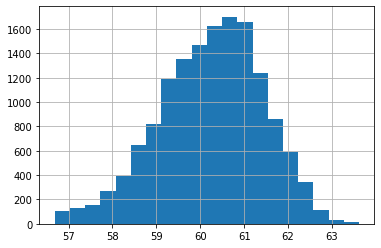

In [22]:
full_clean['total_final_output'].hist(bins=20)

Our distributions look a lot better with the outliers removed. We'll now process our training and test sets to and remove outliers from them. 

In [23]:
#add total mixture column to training data
total_data_columns = full_clean[['date','total_mixture']]
final_train = processed_train.merge(total_data_columns, how='left', on='date')

print("Size before:",final_train.shape[0])

#drop columns where total_mixture is null. This means it was an outlier.
final_train = final_train[final_train.total_mixture.notnull()]
final_train = final_train.drop(['total_mixture'], axis=1)

print("Size after:",final_train.shape[0])




Size before: 11017
Size after: 10058


In [24]:
#do the same for the test set
final_test = test_processed.merge(total_data_columns, how='left',on='date')

print("Size before:",final_test.shape[0])

final_test = final_test[final_test.total_mixture.notnull()]
final_test = final_test.drop(['total_mixture'], axis=1)

print("Size after:",final_test.shape[0])

Size before: 5383
Size after: 4655


Now that we've eliminated anomalies, we have our final datasets which we can use to train and test our data.

# Part 3: Build the model

## Step 1: Create sMAPE calculator

We first need to define a function that calculates sMAPE.

In [25]:
def calc_smape(target, prediction):
    #Symmetric Mean Absolute Percentage Error
    
    def smape(target, prediction):
        smape = np.mean((np.abs(target - prediction)/((np.abs(target)+np.abs(prediction))/2))) * 100
        return smape
    
    smape_r = smape(target[:,0], prediction[:,0])
    smape_f = smape(target[:,1], prediction[:,1])
    final_smape = .25*smape_r + .75*smape_f
    return final_smape

## Step 2: Train models and evaluate

In [26]:
#get features/target for training
train_features = final_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
train_target = final_train[['rougher.output.recovery', 'final.output.recovery']]

#get features/target for testing
test_features = final_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
test_target = final_test[['rougher.output.recovery', 'final.output.recovery']]

#create scorer
smape_scorer = make_scorer(calc_smape) #since we're calculating % error, greater is NOT better.

#scale
scaler = StandardScaler()
train_features = train_features.set_index('date')
test_features = test_features.set_index('date')

all_features = list(train_features.columns)
scaler.fit(train_features[all_features])



train_features[all_features] = scaler.transform(train_features[all_features])
test_features[all_features] = scaler.transform(test_features[all_features])

In [27]:
rf_model = RandomForestRegressor(random_state=12345, n_estimators=20)

rf_train_smape = cross_validate(rf_model,train_features,train_target.to_numpy(), scoring=smape_scorer, cv=5)

for k, v in rf_train_smape.items():
    print(k,v)
    
final_score = rf_train_smape['test_score']
print("Average sMAPE score: ", np.sum(final_score)/5)

fit_time [8.09811425 8.36549425 7.82218719 7.36305308 7.85576773]
score_time [0.00995994 0.00800776 0.00873542 0.00855017 0.00931072]
test_score [7.95210283 8.03092507 5.77258219 9.32798583 9.36561824]
Average sMAPE score:  8.089842834608419


In [28]:
lr_model = LinearRegression()

lr_train_smape = cross_validate(lr_model,train_features,train_target.to_numpy(), scoring=smape_scorer, cv=5)

for k, v in lr_train_smape.items():
    print(k,v)
    
final_score = lr_train_smape['test_score']
print("Average sMAPE score: ", np.sum(final_score)/5)

fit_time [0.09213209 0.19990706 0.11091638 0.19599605 0.19522762]
score_time [0.00269413 0.00263453 0.00266623 0.00264215 0.00229073]
test_score [ 8.86451915  7.82750408  5.98400391  7.5035442  10.53700408]
Average sMAPE score:  8.143315084101419


In [29]:
for depth in range(1,10):
    dc_model = DecisionTreeRegressor(random_state=12345, max_depth=depth)

    dc_train_smape = cross_validate(dc_model,train_features,train_target.to_numpy(), scoring=smape_scorer, cv=5)

    for k, v in dc_train_smape.items():
        print(k,v)

    final_score = dc_train_smape['test_score']
    print("Average sMAPE score with max depth of {}: {}".format(depth, np.sum(final_score)/5))

fit_time [0.05676794 0.07424307 0.0572083  0.05472827 0.05675626]
score_time [0.00173068 0.00173664 0.00181866 0.00181007 0.00169683]
test_score [7.20852613 7.76018208 5.12598764 7.78758019 9.23243458]
Average sMAPE score with max depth of 1: 7.422942124222027
fit_time [0.2066443  0.10676956 0.10414648 0.10856628 0.10877323]
score_time [0.00187778 0.00154543 0.00167418 0.00161767 0.00162148]
test_score [7.2422554  8.29855805 5.03271736 8.35069776 8.32947563]
Average sMAPE score with max depth of 2: 7.450740838691543
fit_time [0.15522337 0.15676165 0.1528151  0.15036845 0.1481216 ]
score_time [0.00162339 0.00174308 0.00163174 0.00171065 0.00147724]
test_score [9.70746769 7.82279497 7.07770947 8.08418903 9.30434165]
Average sMAPE score with max depth of 3: 8.399300560547214
fit_time [0.19811749 0.20394778 0.2992332  0.28840184 0.20413566]
score_time [0.00251603 0.00210452 0.00167036 0.00170612 0.00178647]
test_score [8.77939805 8.84183141 6.95763914 8.28645911 8.71776889]
Average sMAPE s

Cross validating different models shows that our decision tree model with a maximum depth of 1 gives us the least sMAPE. We'll use this to test our model.

In [30]:
dc_model = DecisionTreeRegressor(random_state=12345, max_depth=1)

dc_model.fit(train_features, train_target)

prediction = dc_model.predict(test_features)

smape = calc_smape(test_target.to_numpy(), prediction)

print("sMAPE score:", smape)

sMAPE score: 6.589292163655868


Testing our model gives us a final sMAPE score of 6.59% - better than our average from cross validating our model!